In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [49]:

file_path = '/content/EastWestAirlines.xlsx' # Replace with your file path
excel_df = pd.ExcelFile(file_path)
excel_data = pd.ExcelFile(file_path)
df= excel_data.parse('data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [50]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [51]:
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [53]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [54]:
df.size

47988

In [55]:
df.shape

(3999, 12)

In [56]:
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [57]:
df.duplicated().sum()

0

In [58]:
def hist(df, columns):
  plt.figure(figsize=(30, 20))  # Corrected 'figzise' to 'figsize'
  df.hist(bins=15)
  plt.suptitle('Histogram of Numeric Features')
  plt.show()

<Figure size 3000x2000 with 0 Axes>

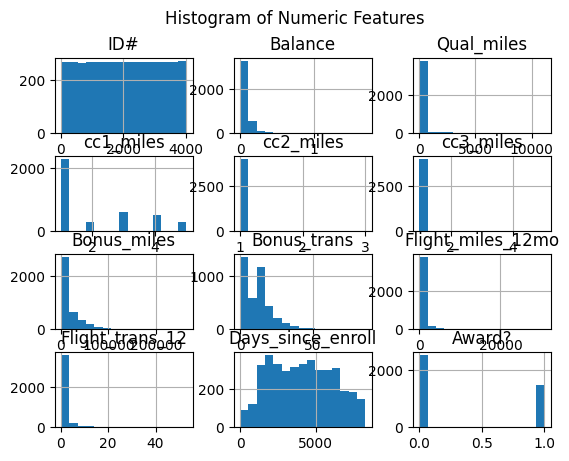

In [59]:
hist(df,df.columns)

In [60]:
def bar(df,columns):
    plt.figure(figsize=(20,10))
    sns.barplot(data=df)
    plt.show()

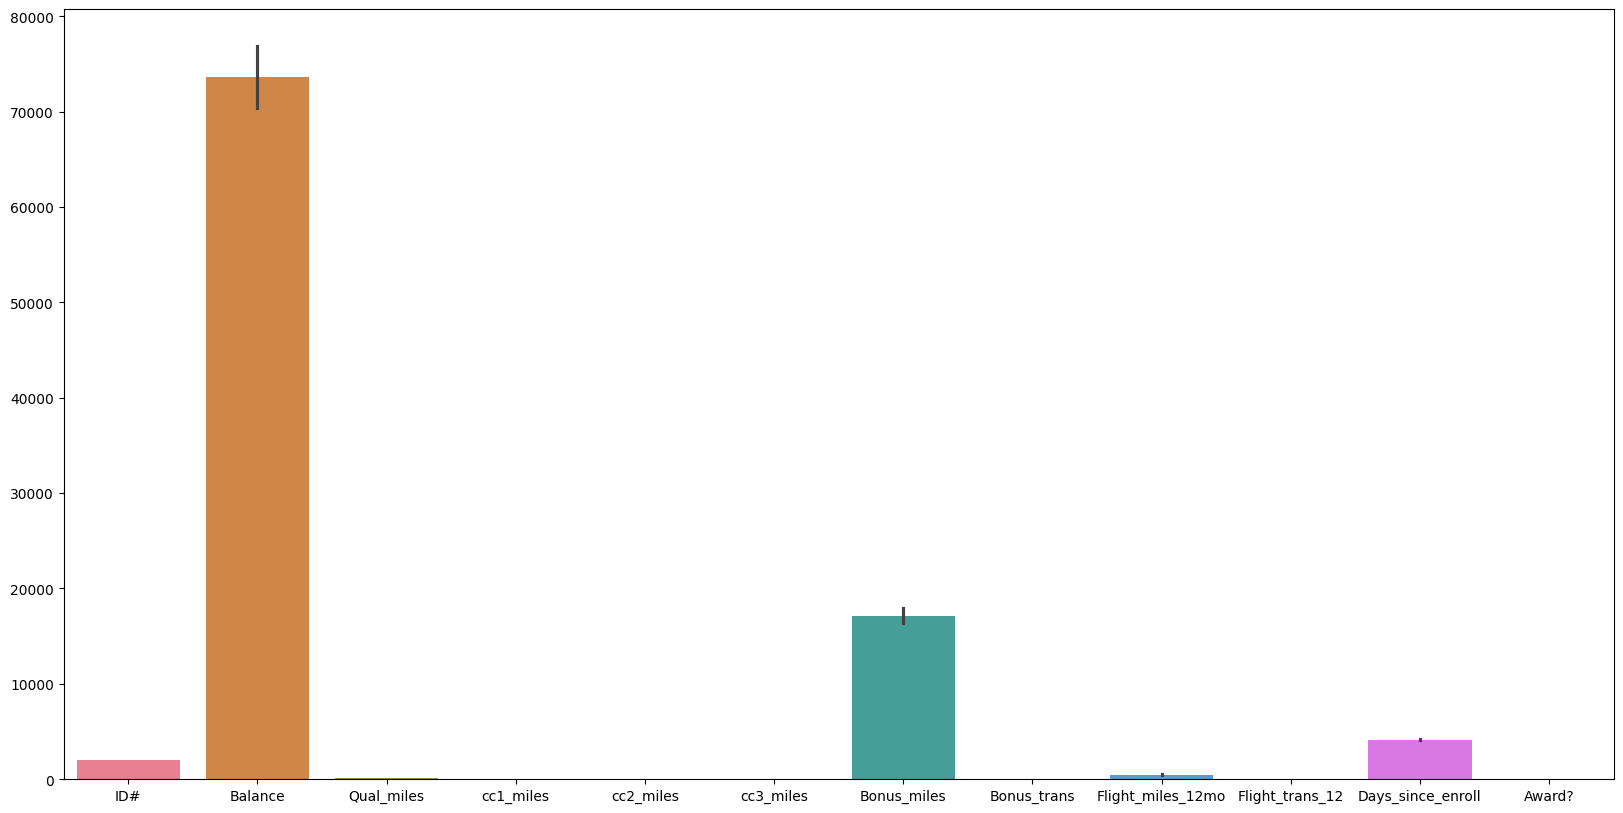

In [61]:
bar(df,df.columns)

In [62]:
def scatter(df,columns):
    plt.figure(figsize=(20,10))
    sns.scatterplot(data=df)
    plt.show()

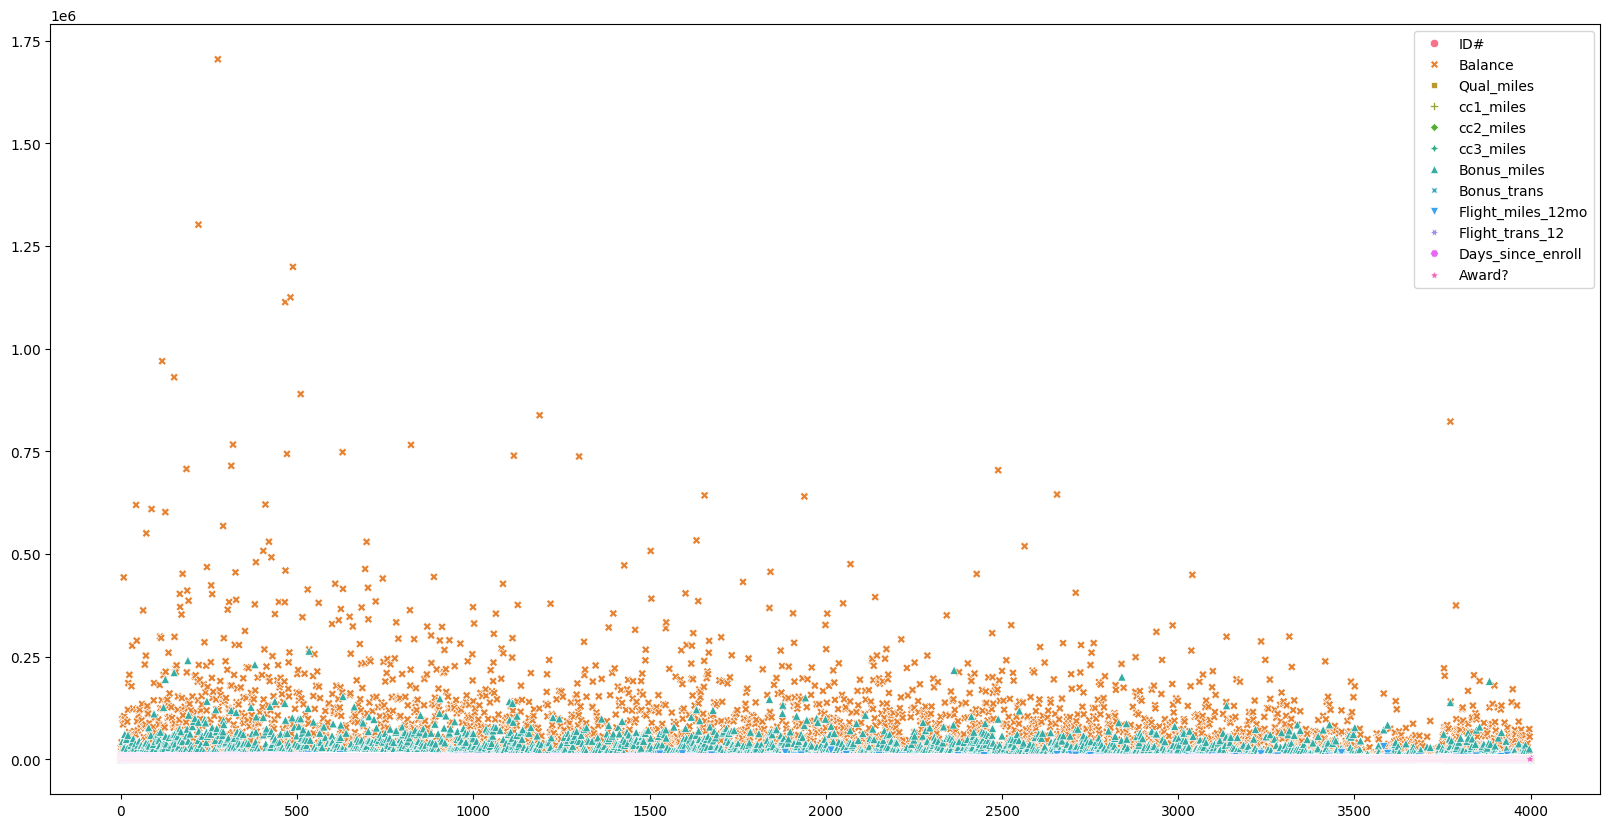

In [63]:
scatter(df,df.columns)

In [64]:
def pair(df,columns):
    plt.figure(figsize=(20,20))
    sns.pairplot(data=df)
    plt.suptitle("Scatter Plot")
    plt.show()

<Figure size 2000x2000 with 0 Axes>

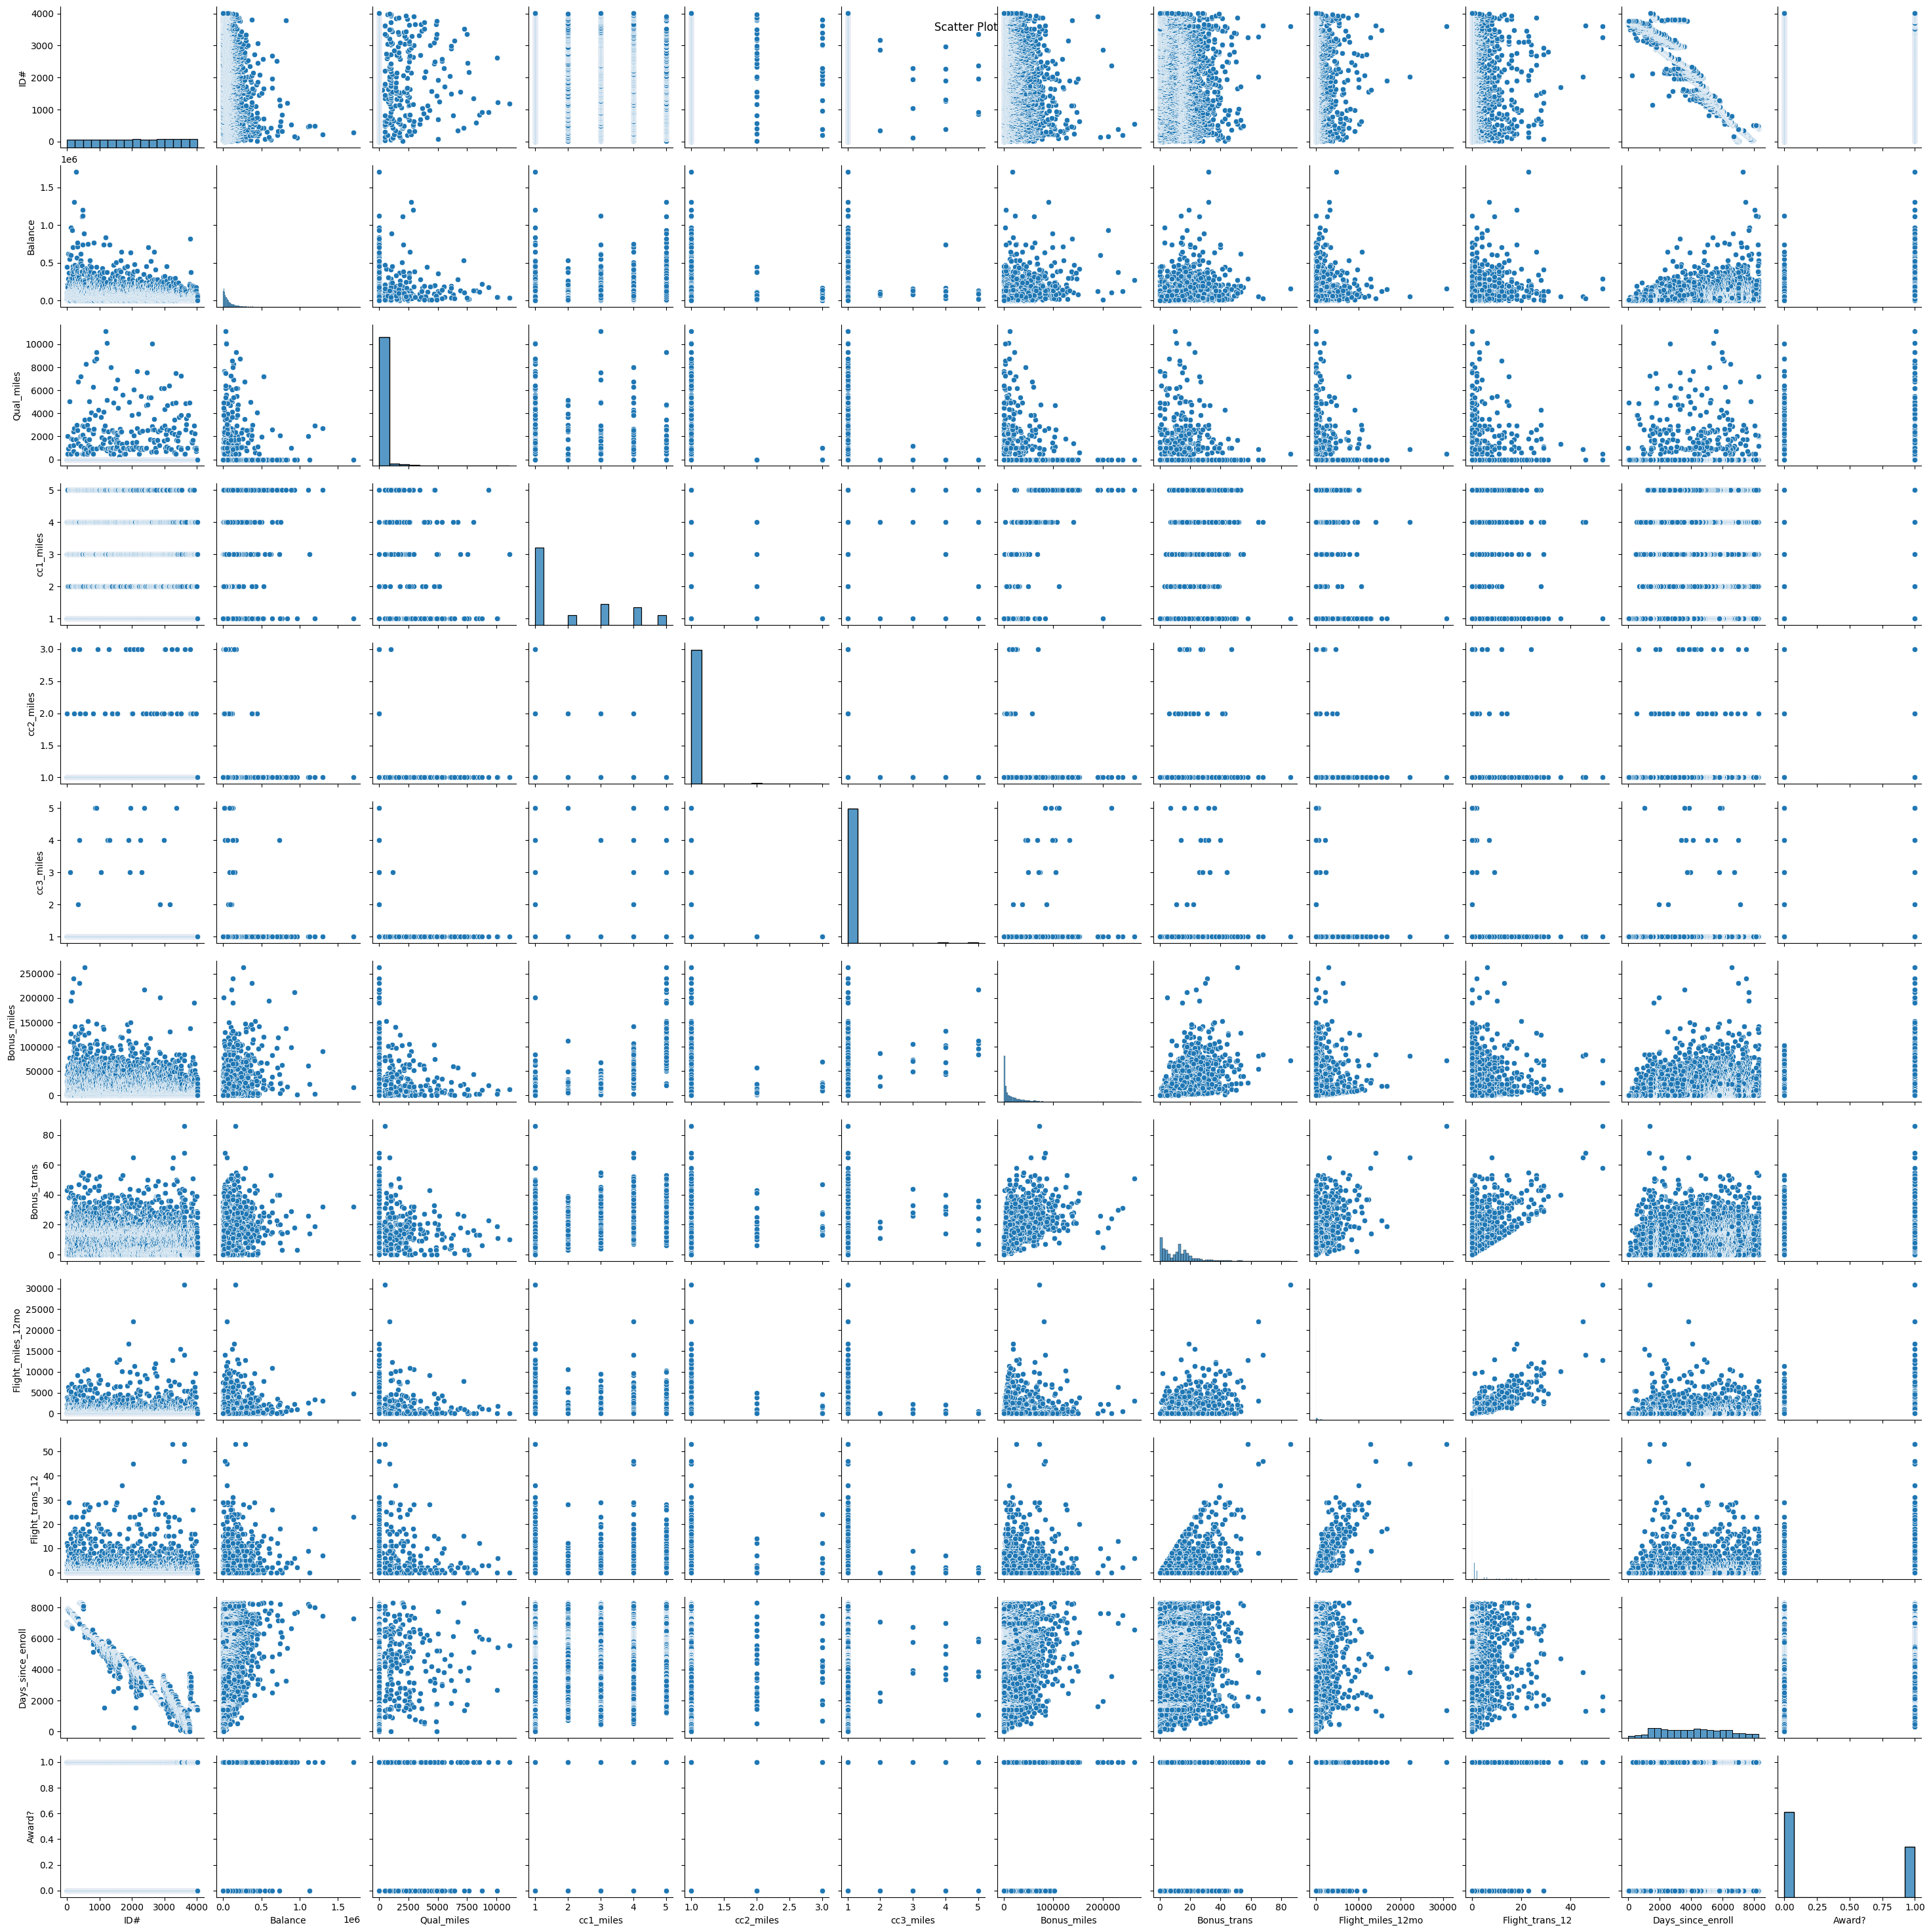

In [65]:
pair(df,df.columns)

In [66]:
def kde(df,columns):
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=df)
    plt.show()

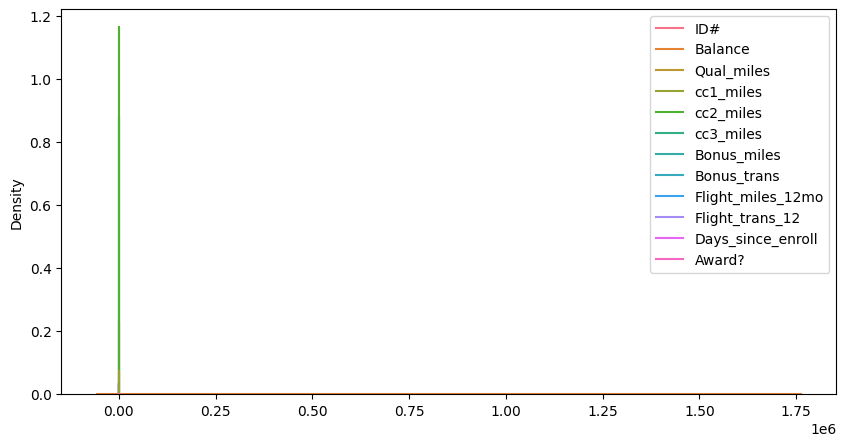

In [67]:
kde(df,df.columns)

In [68]:
def box_plot(df,columns):
    plt.figure(figsize=(20,10))
    sns.boxplot(data=df,color='grey')
    plt.show()

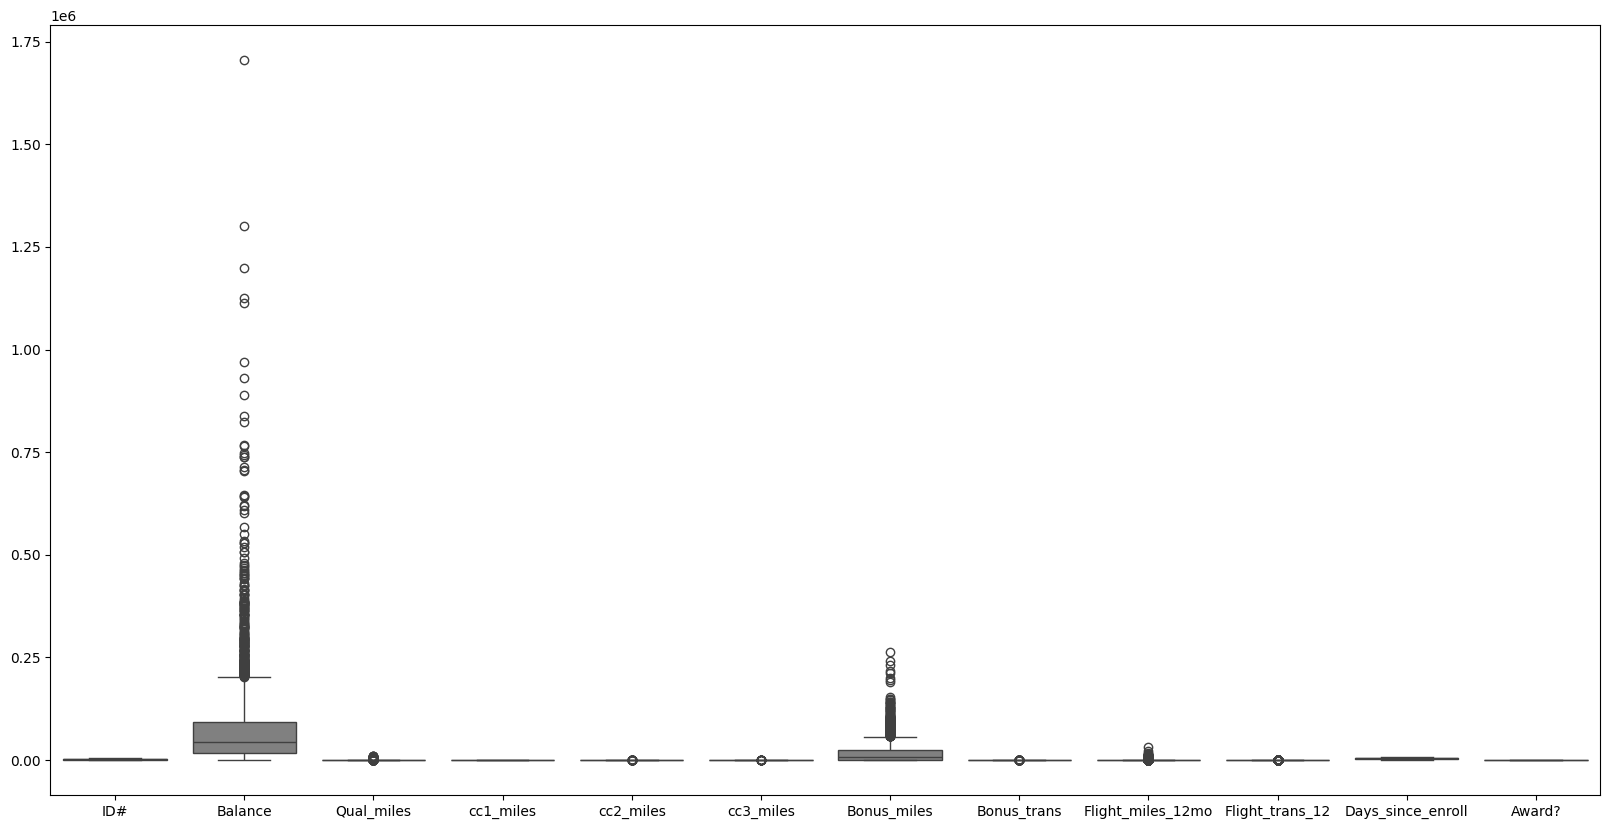

In [69]:
box_plot(df,df.columns)

In [70]:
std=StandardScaler()
d=pd.DataFrame(std.fit_transform(df),columns=df.columns)
d

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


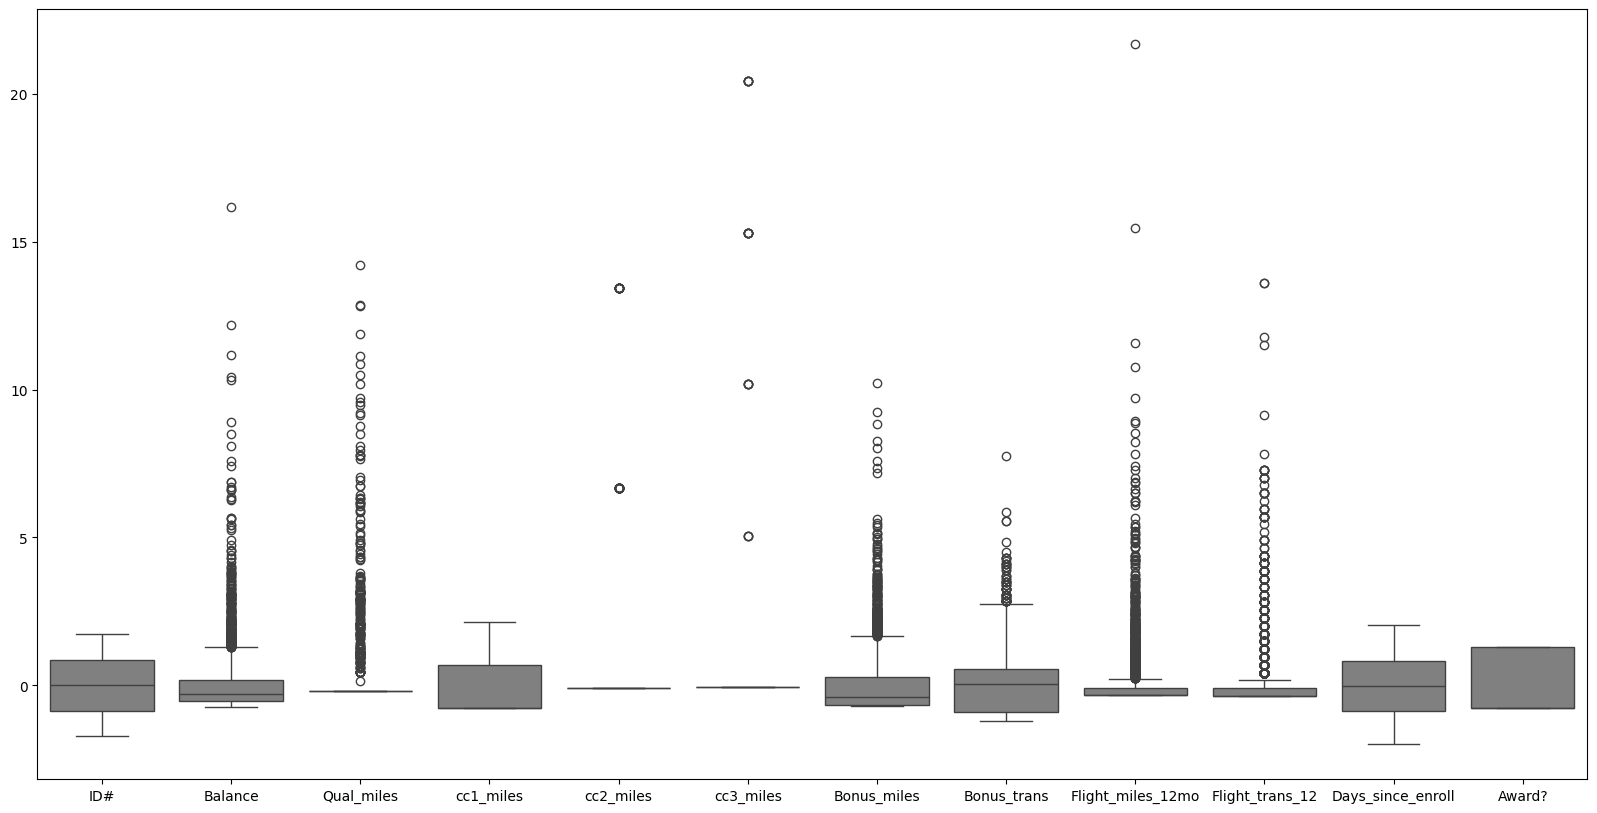

In [71]:
box_plot(d,d.columns)

In [72]:

import scipy.stats as stats
def o_r(df,columns):
    thres=2
    z_score=stats.zscore(df[columns])
    return df[(abs(z_score)<thres).all(axis=1)]
    df=o_r(df,df.columns)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [73]:
d

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [74]:
d=o_r(d,d.columns)

In [75]:
d

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


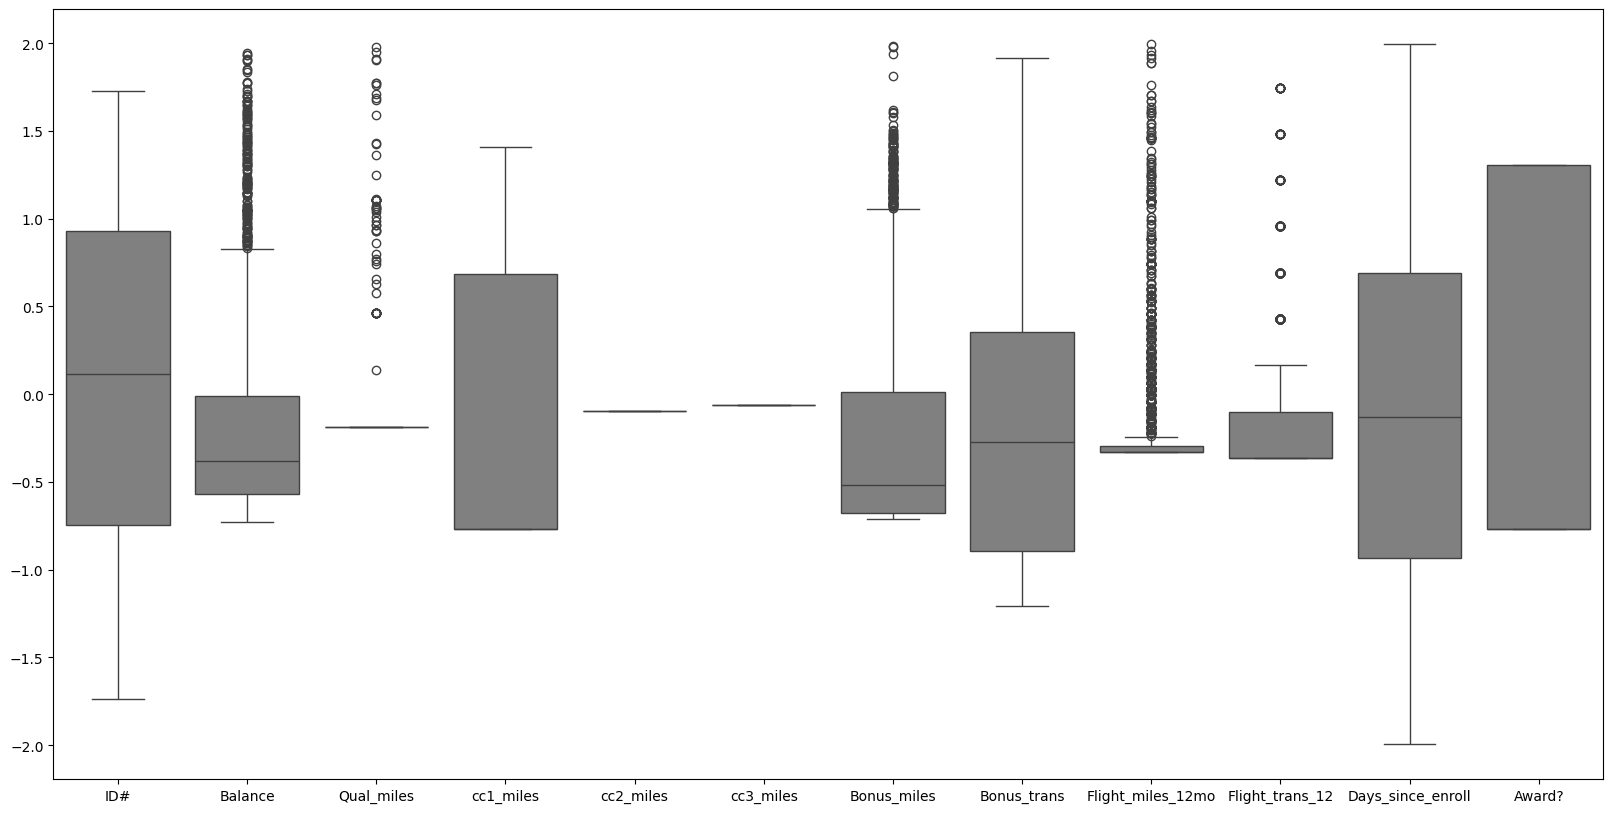

In [76]:
box_plot(d,d.columns)

In [78]:
def corr (df,columns):
    plt.figure(figsize=(20,10))
    sns.heatmap(df.corr(),annot=True)
    plt.show()

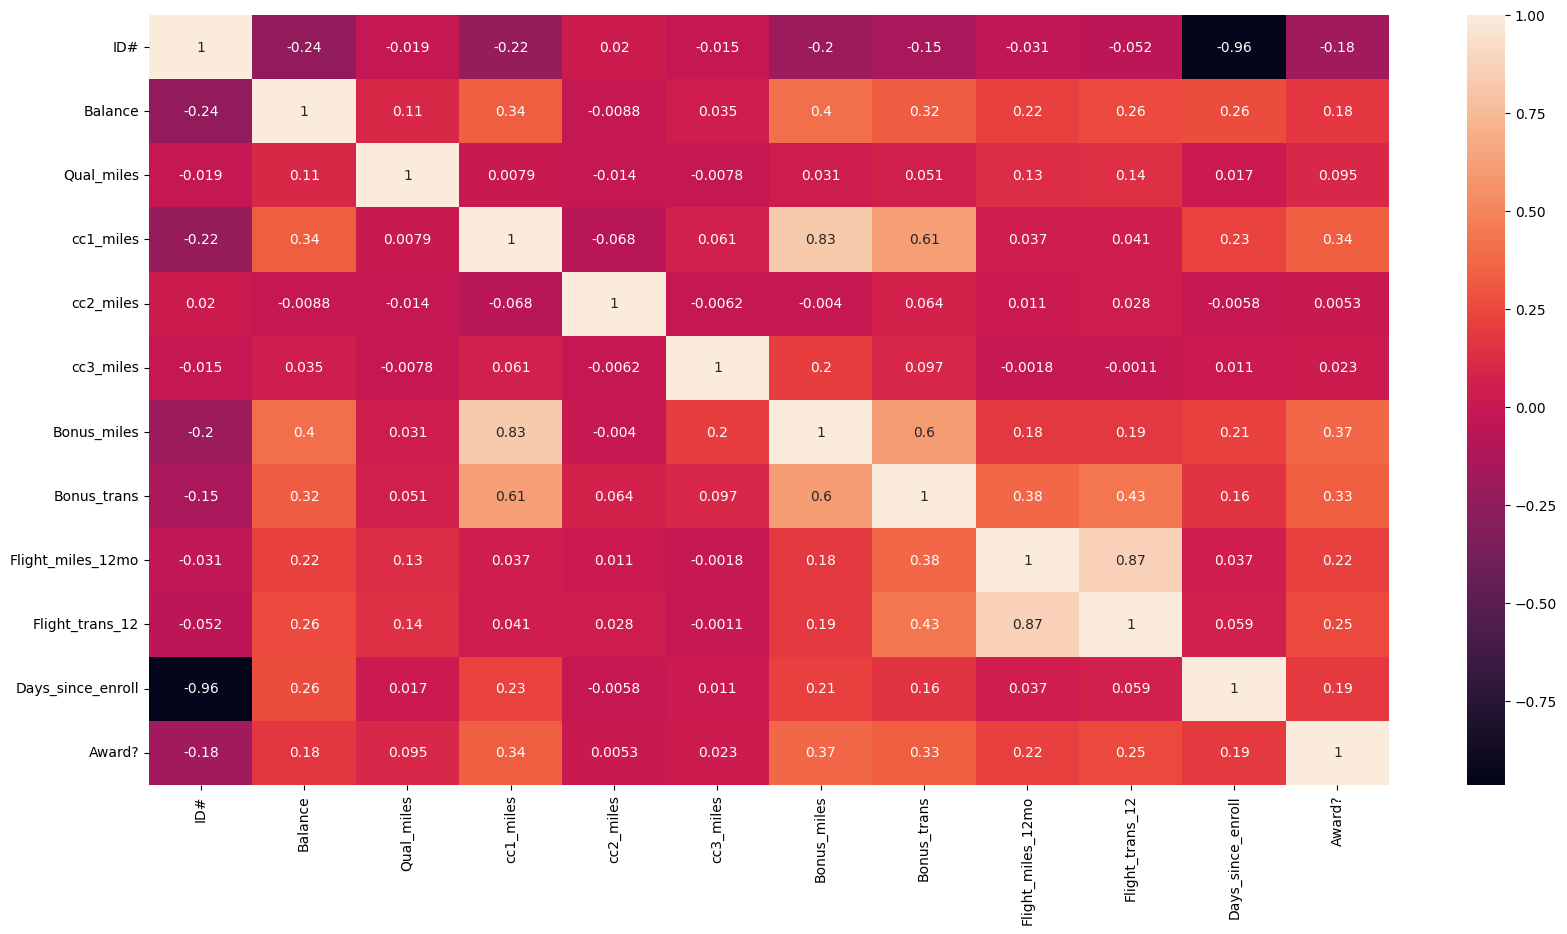

In [80]:
corr(df,df.columns)

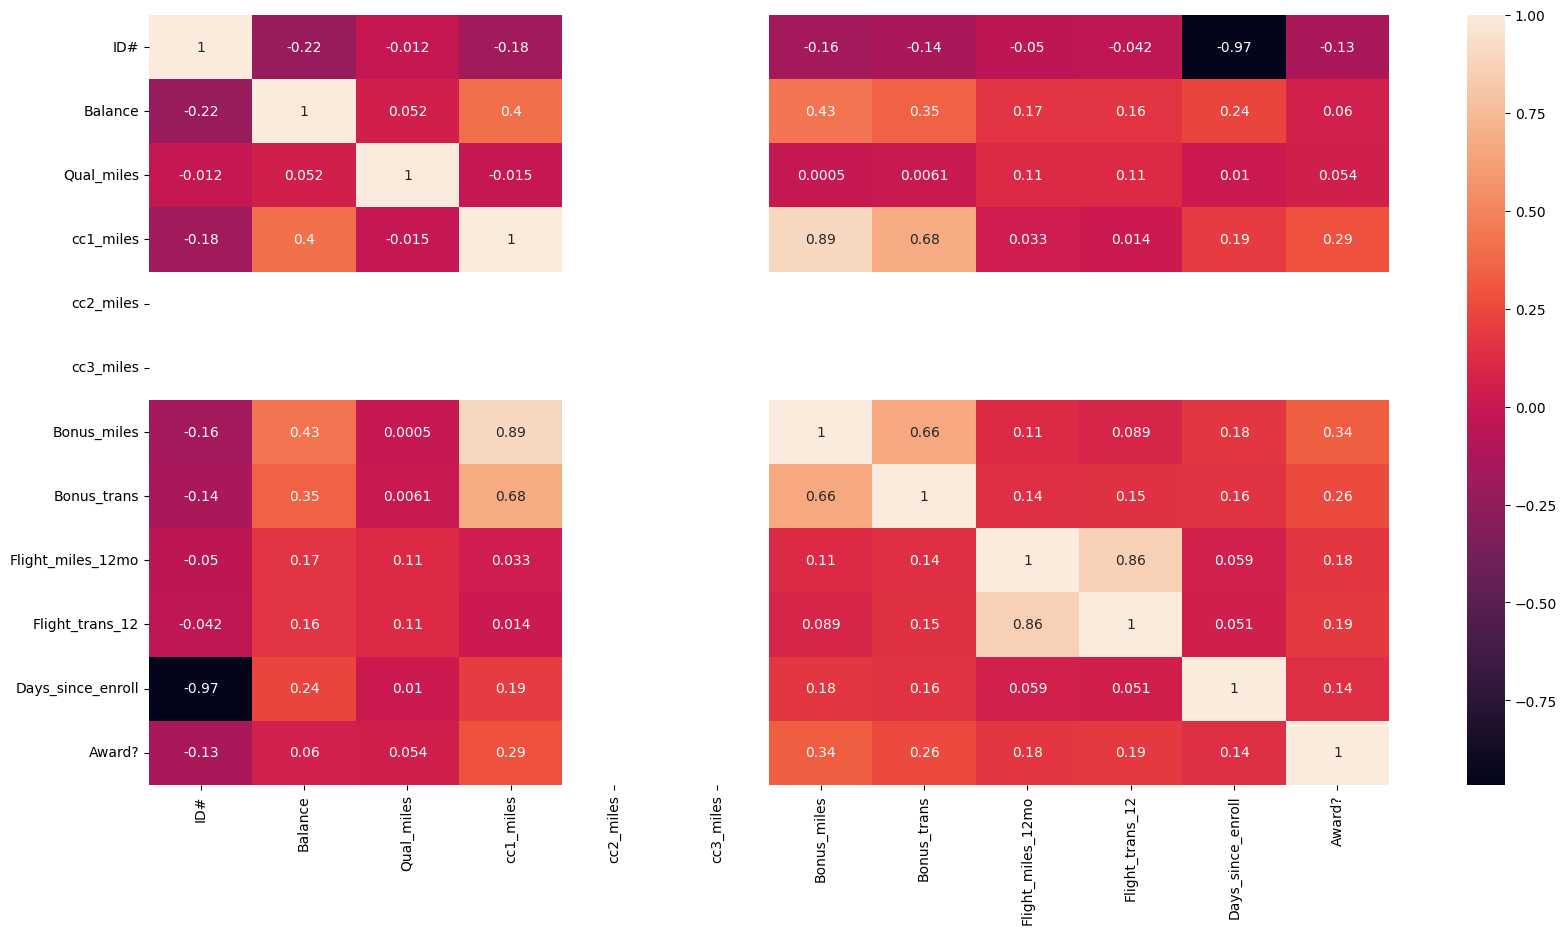

In [79]:
corr(d,d.columns)

## KMEANS CLUSTERS


In [82]:
features=d.drop(columns=['Flight_miles_12mo','ID#','Balance'])

In [83]:
kmeans=KMeans(n_clusters=5,random_state=40)
cluster=kmeans.fit(features)

In [84]:
cluster

KMeans(n_clusters=5, random_state=40)

In [85]:
np.unique(cluster.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

In [89]:
features

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_trans_12,Days_since_enroll,Award?
0,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.362168,1.395454,-0.766919
1,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.362168,1.379957,-0.766919
2,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.362168,1.411920,-0.766919
3,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.362168,1.372208,-0.766919
4,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...
3994,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.098503,-1.315120,1.303918
3995,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.362168,-1.318994,1.303918
3996,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.362168,-1.315604,1.303918
3997,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.098503,-1.316088,-0.766919


In [91]:
silhouette_score(features,cluster.labels_)

0.36129039300941157

In [92]:
## Optimal Value For K

In [93]:
n_clusters=range(1,11)
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
print(inertia)

[11413.729173218495, 7578.192177590471, 6083.896984861374, 4775.705126745078, 3711.8044617254673, 3410.0594612398, 3035.8466141011277, 2831.2692852912023, 2494.073312935492, 2516.396890160683]


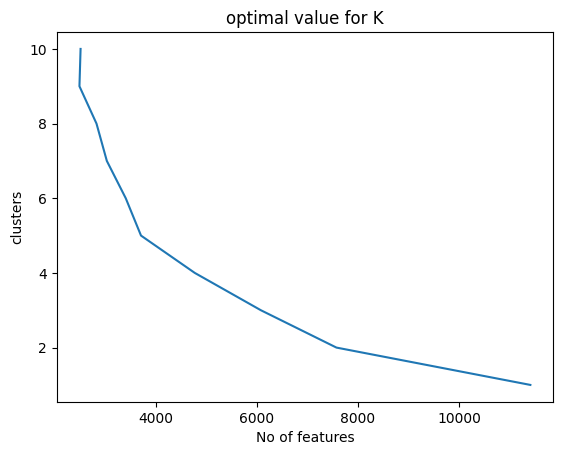

In [94]:
plt.plot(inertia,n_clusters)
plt.xlabel("No of features")
plt.ylabel("clusters")
plt.title("optimal value for K")
plt.show()

## hireachial clustering

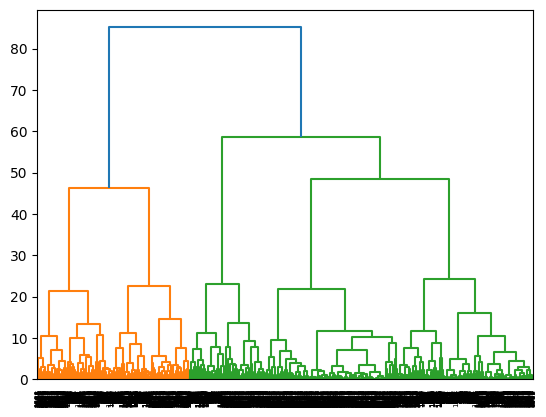

In [96]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(features,method='ward'))


In [98]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
agg=AgglomerativeClustering(n_clusters=5,linkage='ward')
cluster_hc=agg.fit(features)

In [100]:
cluster_hc

AgglomerativeClustering(n_clusters=5)

In [102]:
cluster_hc.labels_

array([0, 0, 0, ..., 4, 3, 3])

In [103]:
silhouette_score(features,cluster_hc.labels_)

0.3477997320473653

## DB SCAN CLUSTERING


In [105]:
features

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_trans_12,Days_since_enroll,Award?
0,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.362168,1.395454,-0.766919
1,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.362168,1.379957,-0.766919
2,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.362168,1.411920,-0.766919
3,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.362168,1.372208,-0.766919
4,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...
3994,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.098503,-1.315120,1.303918
3995,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.362168,-1.318994,1.303918
3996,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.362168,-1.315604,1.303918
3997,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.098503,-1.316088,-0.766919


In [106]:
output=[]
eps= np.arange(1.0,2.0,0.1)
min_node= range(1,10)
for ep in eps:
    for mn in min_node:
        labels= DBSCAN(eps=ep, min_samples=mn).fit(features)
        set=labels.labels_
        score= silhouette_score(features,set)
        output.append([ep,mn,score])
print(output)

[[1.0, 1, -0.029061727550976222], [1.0, 2, 0.17702987680664714], [1.0, 3, 0.25843238634108556], [1.0, 4, 0.30597094007932524], [1.0, 5, 0.3266640971641498], [1.0, 6, 0.32830267262474194], [1.0, 7, 0.33056016461532867], [1.0, 8, 0.32986436411460013], [1.0, 9, 0.32986436411460013], [1.1, 1, 0.10299205227231699], [1.1, 2, 0.26255120535910537], [1.1, 3, 0.26255120535910537], [1.1, 4, 0.32855020083058883], [1.1, 5, 0.32855020083058883], [1.1, 6, 0.32855020083058883], [1.1, 7, 0.3308800481983385], [1.1, 8, 0.3297624348505021], [1.1, 9, 0.3289963934865599], [1.2000000000000002, 1, 0.14473350236489013], [1.2000000000000002, 2, 0.3274987641855437], [1.2000000000000002, 3, 0.3274987641855437], [1.2000000000000002, 4, 0.3274987641855437], [1.2000000000000002, 5, 0.33108678628217086], [1.2000000000000002, 6, 0.33108678628217086], [1.2000000000000002, 7, 0.3348645625524858], [1.2000000000000002, 8, 0.3348645625524858], [1.2000000000000002, 9, 0.3348645625524858], [1.3000000000000003, 1, 0.243436423

In [107]:
a=pd.DataFrame(output)

In [108]:
a

,0,1,2
0,1.0,1,-0.029062
1,1.0,2,0.177030
2,1.0,3,0.258432
3,1.0,4,0.305971
4,1.0,5,0.326664
...,...,...,...
85,1.9,5,0.345735
86,1.9,6,0.345735
87,1.9,7,0.345735
88,1.9,8,0.345735


In [110]:
sil_score=a.iloc[:,2].max()
a[a[2]==sil_score]

,0,1,2
81,1.9,1,0.345735
82,1.9,2,0.345735
83,1.9,3,0.345735
84,1.9,4,0.345735
85,1.9,5,0.345735
86,1.9,6,0.345735
87,1.9,7,0.345735
88,1.9,8,0.345735
89,1.9,9,0.345735


In [111]:
labels=DBSCAN(eps=1.9,min_samples=3)

In [112]:
cluster_db=labels.fit(features)

In [113]:
np.unique(cluster_db.labels_)

array([0, 1])

In [114]:
silhouette_score(features,cluster_db.labels_)

0.34573507061472813

## cluster analysis and interpretation

In [115]:
import warnings
warnings.filterwarnings('ignore')

In [119]:

df = df[df.index.isin(features.index)]
# Now you can assign the cluster labels
df['KMeans_Cluster'] = cluster.labels_
df['Hierarchical_Cluster'] = cluster_hc.labels_
df['DBSCAN_Cluster'] = cluster_db.labels_

In [120]:
print(df.groupby('KMeans_Cluster').mean())
print(df.groupby('Hierarchical_Cluster').mean())
print(df.groupby('DBSCAN_Cluster').mean())

                        ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                
0               1192.968750  43854.387228   14.804348   1.076087        1.0   
1               1768.394737  65681.716599   18.246964   3.451417        1.0   
2               3217.034335  30587.160944   11.447425   1.064378        1.0   
3               1997.030801  48799.708419   38.616016   1.151951        1.0   
4               1861.728261  93713.666667   11.085145   3.182971        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                     1.0   2689.142663     5.495924         140.755435   
1                     1.0  29312.882591    17.176113         273.783401   
2                     1.0   2689.344421     5.316524         106.710300   
3                     1.0   6299.408624     7.371663         344.527721

In [121]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3,2,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3,2,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,4,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,3,0


## visualization

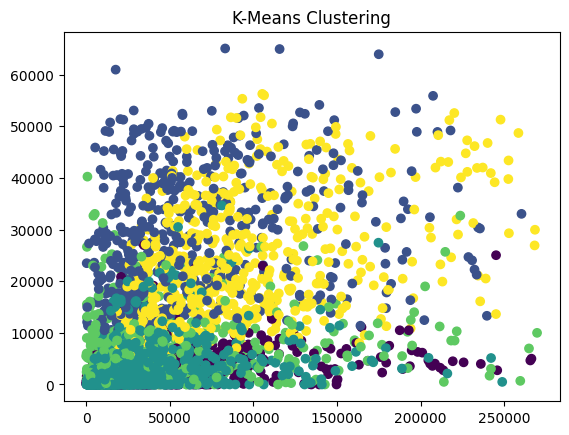

In [122]:
plt.scatter(df.iloc[:, 1], df.iloc[:, 6], c=df['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

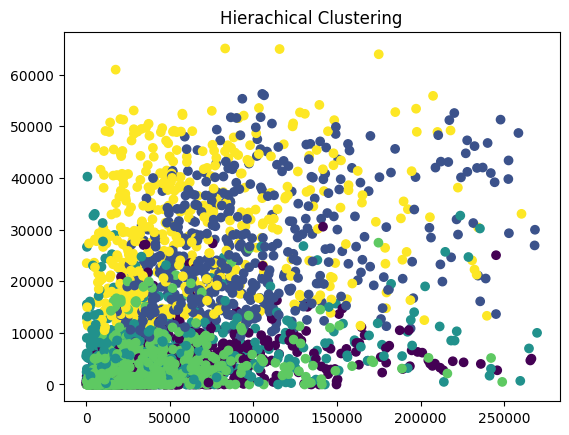

In [123]:
plt.scatter(df.iloc[:, 1], df.iloc[:, 6], c=df['Hierarchical_Cluster'], cmap='viridis')
plt.title('Hierachical Clustering')
plt.show()

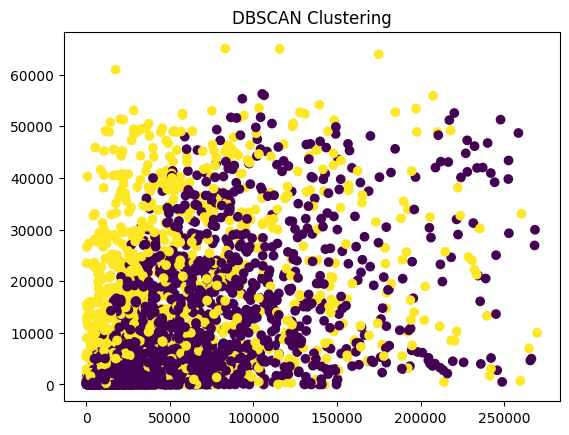

In [124]:
plt.scatter(df.iloc[:, 1], df.iloc[:, 6], c=df['DBSCAN_Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

##Evaluation and Performance Metrics:

In [125]:
silhouette_score(features,cluster.labels_)

0.36129039300941157

In [126]:
silhouette_score(features,cluster_hc.labels_)

0.3477997320473653

In [127]:
silhouette_score(features,cluster_db.labels_)

0.34573507061472813

In [128]:
## Higher silhouette scores indicate better-defined clusters.
### DBSCAN may give lower scores if the data is noisy or contains many outliers.
## K-Means generally performs well on spherical clusters but may struggle with irregular shapes.
### Hierarchical clustering works well with smaller datasets but may become slow with large data.